In [1]:
import string
from os.path import join
import json

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from naturalcogsci.helpers import get_project_root

PROJECT_ROOT = get_project_root()

mpl.rcParams.update(mpl.rc_params_from_file(join(PROJECT_ROOT, ".matplotlibrc")))

FIGWIDTH = mpl.rcParams["figure.figsize"][0]
CMAP = mpl.rcParams["axes.prop_cycle"].by_key()["color"]


with open(join(PROJECT_ROOT, "data", "model_plot_params.json")) as f:
    plot_params = json.load(f)
plot_params = {k.replace("/", "_"): v for k, v in plot_params.items()}
main_feature_names = list(plot_params.keys())

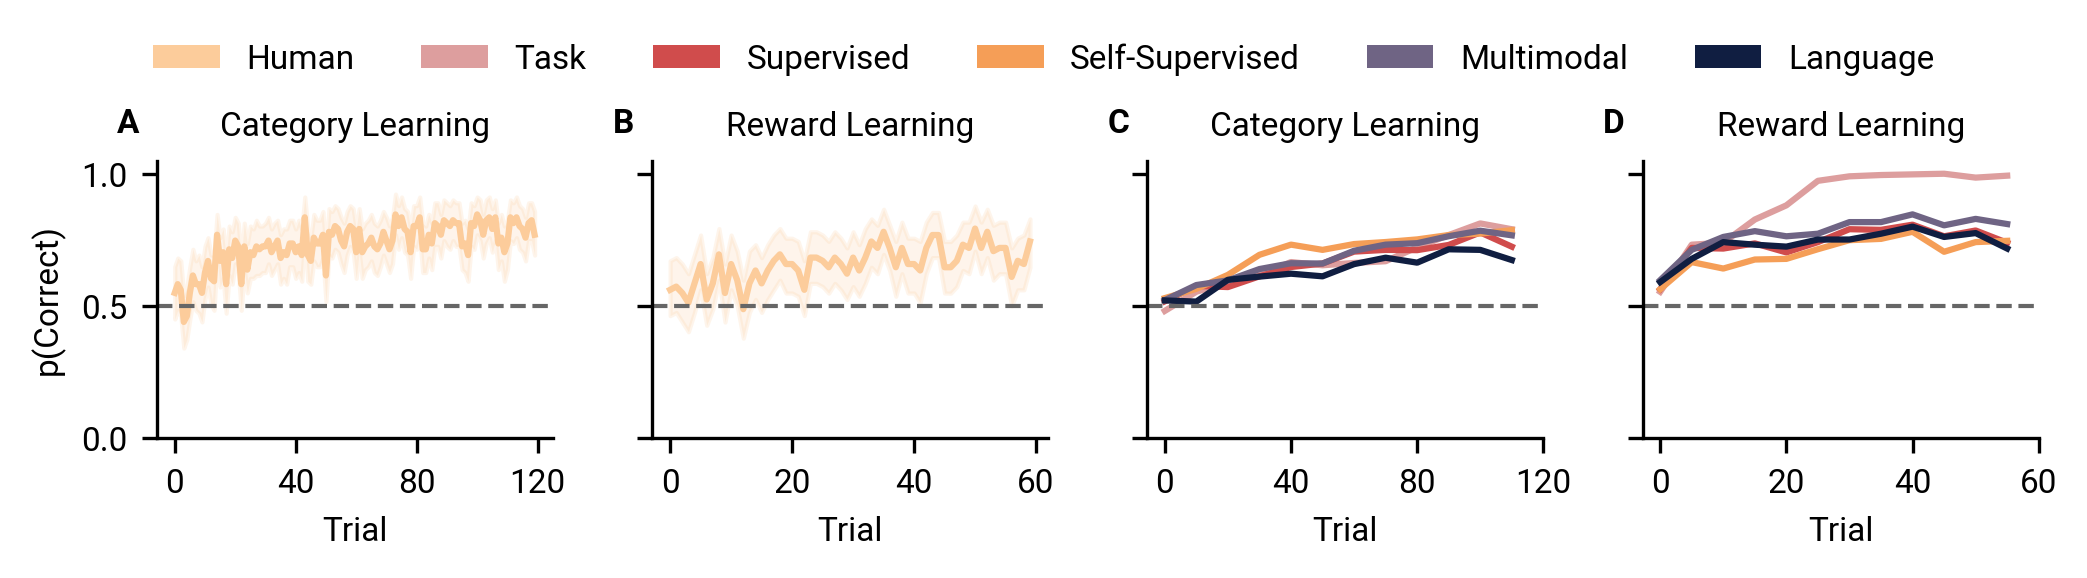

In [2]:
fig, axs = plt.subplots(1,4,figsize=(FIGWIDTH,FIGWIDTH/4),sharey=True)
behavioural_df = pd.read_csv(
    join(
        PROJECT_ROOT,
        "data",
        "human_behavioural",
        "category_learning",
        "above_chance.csv",
    )
)
sns.lineplot(data=behavioural_df, x="trial", y="correct", ax=axs[0], color=CMAP[-2])
axs[0].set_xlabel("Trial")
axs[0].set_ylabel("p(Correct)")
axs[0].axhline(0.5, ls="--", color=CMAP[-1], lw=1)
axs[0].set_xticks([0, 40, 80, 120])
axs[0].text(-0.1, 1.1, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")  

behavioural_df = pd.read_csv(                                                                    
    join(                                                                                        
        PROJECT_ROOT,                                                                            
        "data",                                                                                  
        "human_behavioural",                                                                     
        "reward_learning",                                                                     
        "above_chance.csv",                                                                      
    )                                                                                            
)                                                                                                
sns.lineplot(data=behavioural_df, x="trial", y="correct", ax=axs[1], color=CMAP[-2])             
axs[1].set_xlabel("Trial")                                                                       
axs[1].set_ylabel("p(Best)")                                                                  
axs[1].axhline(0.5, ls="--", color=CMAP[-1], lw=1)                                               
axs[1].set_xticks([0, 20, 40, 60])                                                              
axs[1].text(-0.1, 1.1, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")                       
             

best_models = [
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "category_learning",
        "clip_ViT-L_14_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "category_learning",
        "vit_h_14_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "category_learning",
        "task_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "category_learning",
        "universal_sentence_encoder_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "category_learning",
        "gLocal_dinov2-vit-large-p14_l2_original.csv",
    ),
]

best_models = [pd.read_csv(x) for x in best_models]
best_models = pd.concat(best_models)
cat_models = best_models
best_models['model_choice'] = np.where(best_models.right_value > best_models.left_value,1,0)
best_models["model_correct"] = best_models.true_category_binary == best_models.model_choice
best_models["colour"] = best_models["features"].apply(
    lambda x: plot_params[x]["colour"]
)
best_models["features"] = best_models["features"].apply(
    lambda x: plot_params[x]["name"]
)
best_models = best_models.reset_index(drop=True)

# average correct every 5 trials
best_models["model_correct"] = best_models.groupby(best_models.index // 10)[
    "model_correct"
].transform("mean")
# take every 5th trial
best_models = best_models.iloc[::10, :]


sns.lineplot(
    data=best_models,
    x="trial",
    y="model_correct",
    hue="colour",
    ax=axs[-2],
    palette=CMAP[:-2],
    errorbar=None,
    legend=False,
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)

axs[2].set_xlabel("Trial")
axs[2].set_ylabel("p(Correct)")
axs[2].axhline(0.5, ls="--", color=CMAP[-1], lw=1)
axs[2].set_xticks([0, 40, 80, 120])
axs[2].text(-0.1, 1.1, string.ascii_uppercase[2], transform=axs[2].transAxes, weight="bold")                 



best_models = [
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "reward_learning",
        "clip_ViT-L_14_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "reward_learning",
        "vit_h_14_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "reward_learning",
        "task_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "reward_learning",
        "roberta_l2_original.csv",
    ),
    join(
        PROJECT_ROOT,
        "data",
        "learner_behavioural",
        "reward_learning",
        "dino-rn50_l2_original.csv",
    ),
]

best_models = [pd.read_csv(x) for x in best_models]
best_models = pd.concat(best_models)
best_models['model_choice'] = np.where(best_models.right_value > best_models.left_value,1,0)
best_models["true_category_binary"] = np.where(
    best_models.right_reward >= best_models.left_reward, 1, 0
)
best_models["model_correct"] = best_models.true_category_binary == best_models.model_choice

best_models["colour"] = best_models["features"].apply(
    lambda x: plot_params[x]["colour"]
)
best_models["features"] = best_models["features"].apply(
    lambda x: plot_params[x]["name"]
)
best_models = best_models.reset_index(drop=True)
# average correct every 5 trials after the first trial


best_models["model_correct"] = best_models.groupby(best_models.index // 5)[
    "model_correct"
].transform("mean")
# take every 5th trial
best_models = best_models.iloc[::5, :]

sns.lineplot(
    data=best_models,
    x="trial",
    y="model_correct",
    hue="colour",
    ax=axs[-1],
    palette=CMAP[:-2],
    errorbar=None,
    legend=False,
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)

axs[-1].set_xlabel("Trial")
axs[-1].set_ylabel("p(Best)")
axs[-1].axhline(0.5, ls="--", color=CMAP[-1], lw=1)
axs[-1].set_xticks([0, 20, 40, 60])
axs[3].text(-0.1, 1.1, string.ascii_uppercase[3], transform=axs[3].transAxes, weight="bold")                 

axs[0].set_title("Category Learning")
axs[1].set_title("Reward Learning")
axs[2].set_title("Category Learning")
axs[3].set_title("Reward Learning")

custom_legend_lines = [
    mpatches.Patch(
        facecolor=x,
        edgecolor=None,
        lw=2,
    )
    for x in [CMAP[-2],CMAP[0],CMAP[1],CMAP[2],CMAP[3],CMAP[4]]
]
axs[0].set_ylim([0.,1.])

hue_order = [
    "Human",
    "Task",
    "Supervised",
    "Self-Supervised",
    "Multimodal",
    "Language",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.5, 1.),
    ncol=6,
    frameon=False,
)

for ax in axs:
    ax.set_ylim([0,1.05])

plt.tight_layout()
plt.show()


fig.savefig(join(PROJECT_ROOT, "figures","neurips_learning_curves.pdf"), bbox_inches='tight')
fig.savefig(join(PROJECT_ROOT, "figures","neurips_learning_curves.svg"), bbox_inches='tight')